In [1]:
import pandas as pd
import numpy as np

asbestos = pd.read_csv("Asbestos.csv")

In [2]:
query_mask = asbestos['city'] == 'PITTSBURGH'
asbestos_in_pitt = asbestos[query_mask]

<AxesSubplot:>

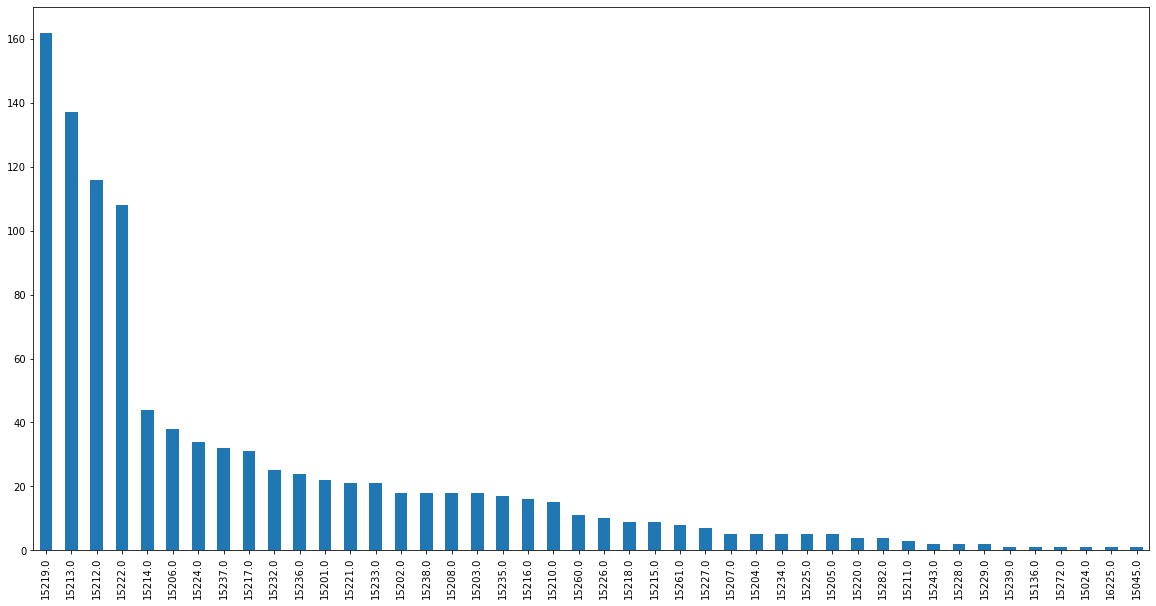

In [3]:
zip_and_asbestos = pd.DataFrame({'zip_code':asbestos_in_pitt['z_code'],'asbestos_free':asbestos_in_pitt['job_complete']})
query_mask2 = zip_and_asbestos['asbestos_free'] == 'f'
contains_asbestos = zip_and_asbestos[query_mask2]
contains_asbestos['zip_code'].value_counts().plot.bar(figsize=(20,10))

In [4]:
contains_asbestos['zip_code'].value_counts()

15219.0    162
15213.0    137
15212.0    116
15222.0    108
15214.0     44
15206.0     38
15224.0     34
15237.0     32
15217.0     31
15232.0     25
15236.0     24
15201.0     22
15221.0     21
15233.0     21
15202.0     18
15238.0     18
15208.0     18
15203.0     18
15235.0     17
15216.0     16
15210.0     15
15260.0     11
15226.0     10
15218.0      9
15215.0      9
15261.0      8
15227.0      7
15207.0      5
15204.0      5
15234.0      5
15225.0      5
15205.0      5
15220.0      4
15282.0      4
15211.0      3
15243.0      2
15228.0      2
15229.0      2
15239.0      1
15136.0      1
15272.0      1
15024.0      1
16225.0      1
15045.0      1
Name: zip_code, dtype: int64